## improt required modules and read image

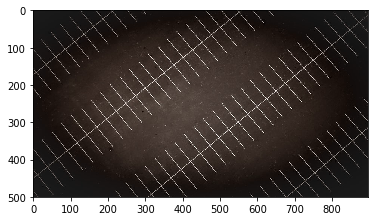

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read image using cv2.imread function

image = cv2.imread('photo-1493780758133-e5cfb0d00354.jpeg')
plt.imshow(image)

## Convert this image into Rgb color space bacuse opencv read image in BGR format by default

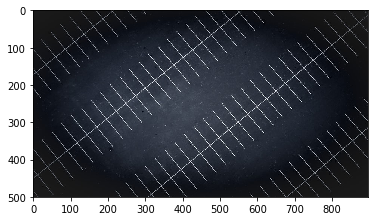

In [2]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

## Convert this Rgb image into Gray scale

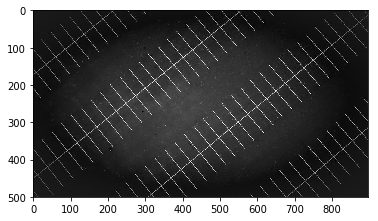

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

## Now apply Canny filter in order to obtain edges from this image

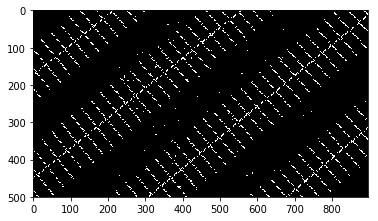

In [4]:
# define thresh hold values it can be varry according to image 
low_threshold = 90
high_threshold = 190
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

## Define the Hough transform parameters

In [5]:
rho = 1
# rho stands for Distance resolution of the accumulator in pixels
theta = np.pi/180
# theta is angle resolution of the accumulator in radians
threshold = 40
# Only those lines are returned that get enough threshold
minLineLength = 20
# maxLineGap Maximum allowed gap between points on the same line to link them.
maxLineGap = 10
# Maximum allowed gap between points on the same line to link them.

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        minLineLength, maxLineGap)
# here lines are cordinates of line that are obtained from Hough Transform
print("Total number of detected lines are :",len(lines))
print("Coordinates of first Line :", lines[0])

Total number of detected lines are : 205
Coordinates of first Line : [[  8 442 376 144]]


## Draw these lines on Original image

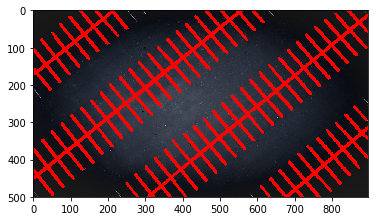

In [6]:
# Iterate over the output "lines" and draw lines on the rgb image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

## Now save this output image using matplotlib

In [7]:
plt.imsave("output_image.jpg",line_image)